# Linear Regression Tutorial

In [1]:
# packages we will be using
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
import numpy as np
import pandas as pd

## What is Linear Regression?

Finding a straight line of best fit through the data. This works well when the true underlying function is linear.

### Example

We use features $\mathbf{x}$ to predict a "response" $y$. For example we might want to regress `num_hours_studied` onto `exam_score` - in other words we predict exam score from number of hours studied.

Let's generate some example data for this case and examine the relationship between $\mathbf{x}$ and $y$.

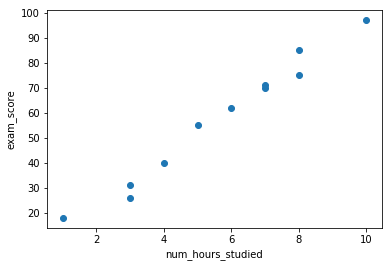

In [2]:
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.show()

We can see the this is nearly a straight line. We suspect with such a high linear correlation that linear regression will be a successful technique for this task.

We will now build a linear model to fit this data.

### Linear Model

#### Hypothesis

A linear model makes a "hypothesis" about the true nature of the underlying function - that it is linear. We express this hypothesis in the univariate case as

$$h_\theta(x) = ax + b$$

Our simple example above was an example of "univariate regression" - i.e. just one variable (or "feature") - number of hours studied. Below we will have more than one feature ("multivariate regression") which is given by

$$h_\theta(\mathbf{x}) = \mathbf{a}^\top \mathbf{X}$$

Here $\mathbf{a}$ is a vector of learned parameters, and $\mathbf{X}$ is the "design matrix" with all the data points. In this formulation the intercept term has been added to the design matrix as the first column (of all ones).

#### Design Matrix

In general with $n$ data points and $p$ features our design matrix will have $n$ rows and $p$ columns.

Returning to our exam score regression example, let's add one more feature - number of hours slept the night before the exam. If we have 4 data points and 2 features, then our matrix will be of shape $4 \times 3$ (remember we add a bias column). It might look like

$$
\begin{bmatrix}
    1 & 1 & 8 \\
    1 & 5 & 6 \\
    1 & 7 & 6 \\
    1 & 8 & 4 \\
\end{bmatrix}
$$

Notice we do **not** include the response in the design matrix.

#### Univariate Example

Let's now see what our univariate example looks like

In [3]:
# Fit the model
exam_model = linear_model.LinearRegression(normalize=True)
x = np.expand_dims(num_hours_studied, 1)
y = exam_score
exam_model.fit(x, y)
a = exam_model.coef_
b = exam_model.intercept_
print(exam_model.coef_)
print(exam_model.intercept_)

[9.40225564]
4.278195488721785


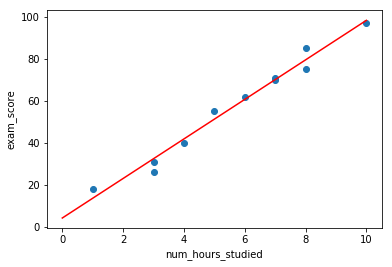

In [4]:
# Visualize the results
plt.scatter(num_hours_studied, exam_score)
x = np.linspace(0, 10)
y = a*x + b
plt.plot(x, y, 'r')
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.show()

The line fits pretty well using the eye, as it should, because the true function is linear and the data has just a little noise.

But we need a mathematical way to define a good fit in order to find the optimal parameters for our hypothesis.

### What is a Good Fit?

Typically we use "mean squared error" to measure the goodness of fit in a regression problem.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - h_\theta^{(i)})^2$$

You can see that this is measuring how far away each of the real data points are from our predicted point which makes good sense. Here is a visualization

![MSE](http://www.statisticshowto.com/wp-content/uploads/2015/03/residual.png)

(Image taken from http://www.statisticshowto.com/rmse/)

This function is then taken to be our "loss" function - a measure of how badly we are doing. In general we want to minimize this.

### How to learn the parameters?

#### Optimization Problem

The typical recipe for machine learning algorithms is to define a loss function of the parameters of a hypothesis, then to minimize the loss function. In our case we have the optimization problem

$$\min_{\mathbf{a}} \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \mathbf{a}^\top\mathbf{X}^{(i)})^2$$

Note that we have added the bias into the design matrix.

This happens to be a convex function. So the "loss surface" (i.e. the map of the loss values over all the parameter values) has a nice convex shape like so:

![convex function](http://theinf2.informatik.uni-jena.de/theinf2_multimedia/bilder/lectures/convex-width-244-height-261.jpg)

(Image taken from http://theinf2.informatik.uni-jena.de/Lectures/Convex+Optimization.html)

This has the nice property that regardless of where you are on the loss surface you always know how to move to reach the global minimum.

#### Normal Equations

Linear regression actually has a closed-form solution - the normal equation. It is beyond our scope to show the derivation, but here it is:

$$\mathbf{a}^* = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$$

We won't be implementing this equation, but you should know this is what `sklearn.linear_model.LinearRegression` is doing under the hood. We will talk more about optimization in later tutorials, where we have no closed-form solution.

Sometimes you might encounter an error that complains you have a singular design matrix. This usually occurs when you have redundant features. For example you might have two features for `distance`: one in metres, another in kilometres. These columns will therefore be linearly dependent - and the matrix therefore singular. In these cases you can simply remove the redundant feature column.

### Normalization

It is a good idea to normalize all the values in the design matrix. This means all values should be in the range $(0, 1)$ and centered around zero.

![normalization](http://cs231n.github.io/assets/nn2/prepro1.jpeg)

(Image taken from http://cs231n.github.io/neural-networks-2/)

Normalization helps the learning algorithm perform better. A deeper discussion of this is beyond our current scope. Just think of it as a practical trick for now.

Fortunately, `sklearn.linear_model.LinearRegression` has an initialization parameter `normalize` that will take care of this for you. Beware that its default is `False` so you will need to set this yourself manually if you want it. Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

## Practice #1

In this first practice our goals are:
1. Load the data
2. Visualize the relationships in the data
3. Prepare the data for the learning algorithm
4. Fit the data

### Dataset

The data for this example come from a study by Stamey et al. (1989). They examined the correlation between the level of prostate-specific antigen and a number of clinical measures in men who were about to receive a radical prostatectomy. The variables are 
- log cancer volume ( lcavol )
- log prostate weight ( lweight )
- age
- log of the amount of benign prostatic hyperplasia ( lbph )
- seminal vesicle invasion ( svi )
- log of capsular penetration ( lcp )
- Gleason score ( gleason )
- percent of Gleason scores 4 or 5 ( pgg45 )

(Taken from Elements of Statistical Learning, Hastie and Tibshirani).

So we have eight features (our $\mathbf{X}$) to predict our response $y$, the level of prostate-specific antigen (`lpsa`).

### Load the Data

The data comes in `.csv` format. We will use the `pandas` library (which we imported as `pd`) to load and manage the data. It is a very convenient library for handling data and conducting machine learning experiments.

Your first task is to use the `pd.read_csv()` function to load the data. We have given you the file name to use as `file_name`. You can refer to the documentation here (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) for details on all the options. Pay particular attention to `sep` and `index_col` (you only need these two). This data is separated by the tab character `'\t'` and the index column is the first one (remember python uses zero-based indexing). Take a look at the raw data (just load the file in a text editor) to see what you are doing and get a feel for this important step.

Make sure you load the data into a variable named `data`. The following cell will help confirm you have completed this first step successfully.

If you want to see what you have loaded type `data.head()` as the bottom line in the cell to debug.

In [5]:
"""
Task: Load the data with pandas
"""
file_name = 'prostate.csv'
data = pd.read_csv('prostate.csv', sep='\t', index_col=0)

In [6]:
assert len(data.columns) == 10
assert len(data) == 97
for column_name in ['lcavol', 'lweight', 'age', 'lbph', 'svi', 
                    'lcp', 'gleason', 'pgg45', 'lpsa', 'train']:
    assert column_name in data.columns
print('Success!')

Success!


Let's now take a look at the data.

In [7]:
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


We can see we have our eight feature columns and the response `lpsa` as well. We also have another column called `train` which is a boolean column. This tells us which data points to include in our training set, and which to hold our for testing.

We will discuss training versus testing further below.

### Visualize the Data

In order to assess the suitability of linear regression for each of the features, we should always try and plot the relationships in the data.

Scatter plots are useful. We can make one for each feature. We will use `matplotlib` to do this. The first one we will do for you, then you should visualize the rest, exploring the relationships in the data.

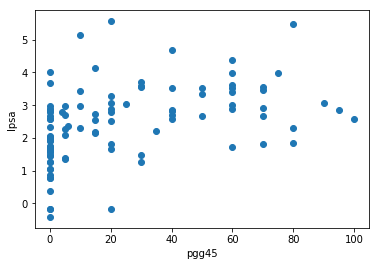

In [8]:
# function to help us plot
def scatter(_data, x_name):
    plt.scatter(_data[x_name], _data['lpsa'])
    plt.xlabel(x_name)
    plt.ylabel('lpsa')
    plt.show()

scatter(data, 'pgg45')

There is a pretty clear linear relationship there. It is far from as clean as our toy example at the start of this tutorial. But this is more realistic data, so there will not be such easy relationships and such clean data.

Use the cell below (or add more) to play with our `scatter` function and investigate the relationships between the response and the other features.

In [9]:
"""
Task: Explore the relationships between the response and the other features
"""


'\nTask: Explore the relationships between the response and the other features\n'

### Prepare the Data

We noticed when we loaded the data that we had an extra column indicating whether the data point should be used to train the model parameters, or whether it should be held out for testing.

We now need to separate our data into train and test sets. This is your next task.

You will need to use the pandas selection syntax which for an "equals" relation is:

```
new_data = data[data['column_name'] == desired_value]
```

You must create two new variables, `train` and `test` including the correct data points. 

We also don't want to keep those columns and mess up our design matrix, so we will use `data.drop()` to do that. Refer here (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) for reference on this function. Note that we need to pass a list of column names to drop, and specify the axis (where `1` is the column axis) like

```
new_data = data.drop(['unwanted_column'], axis=1)
```

The following cell will validate your work.

In [10]:
"""
Task: Split the data into train and test
"""
train = data[data['train'] == 'T'].drop(['train'], axis=1)
test = data[data['train'] == 'F'].drop(['train'], axis=1)

In [11]:
assert len(train) == 67
assert len(test) == 30
assert 'train' not in train.columns
assert 'train' not in test.columns
assert len(train.columns) == 9
assert len(test.columns) == 9
print('Success!')

Success!


Next we need to prepare the design matrix for the learning algorithm, and the response vector. 

The response vector can be recovered with simple selection (like we saw above in visualization - i.e. `data[column_name]`). 

A nice syntax for selecting all columns except one from a `DataFrame` is

```
data.loc[:, data.columns != column_name]
```

In pandas `loc` allows boolean indexing of rows and columns. So the above code can be read as "select all rows and all columns except `column_name`. The `:` symbol means all. The first position inside the square brackets is the rows (axis 0) - so all rows. In the second position, columns (axis 1), we have something more going on. Let's investigate that first

In [12]:
train.columns != 'lpsa'

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

We can see we have a boolean vector. This tells us which columns to select. They are ordered, so we can see that `'lpsa'` is the last column, where the `False` appears. We can confirm this by looking at the `data.head()` output above.

Now you have the tools you need to complete the next task. The variables you need to create are
- `x_train`
- `y_train`
- `x_test`
- `y_test`

In [13]:
x_train = train.loc[:, train.columns != 'lpsa']
y_train = train['lpsa']
x_test = test.loc[:, test.columns != 'lpsa']
y_test = test['lpsa']

In [14]:
assert len(x_train.columns) == 8
assert len(x_test.columns) == 8
assert len(y_train) == 67
assert len(y_test) == 30
print('Success!')

Success!


### Fit the Data

#### Learn the Parameters

Fitting the model really is the easy part, as far as coding is concerned. Data preparation is usually the most time consuming.

There is an example of how to fit the model at the top of the tutorial already. This is your next task.

You need to create a new instance of `sklearn.linear_model.LinearRegression` and use the `fit()` function to fit it to `x_train` using `y_train`. The documentation is here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

(Note that when you choose `normalize=True` the argument `fit_intercept` is ignored, since we have centered the data around zero)

In [15]:
model = linear_model.LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

#### Assess the Goodness of Fit

Let's now assess the performance of this fit using mean squared error. `sklearn` makes this easy to calculate, providing the `sklearn.metric.mean_squared_error` function - reference here http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html.

In [16]:
train_pred = model.predict(x_train)
mse_train = metrics.mean_squared_error(y_train, train_pred)
print(mse_train)

0.43919976805833433


You might be wondering, how good of a fit is this in absolute terms? How should I interpret this value?

If we take the square root of the MSE we get a value that relates directly to our response, $y$. So we can make a judgment in terms of its accuracy with respect to our quantity of interest.

In [17]:
np.sqrt(mse_train)

0.662721486039448

We can use `pandas` to get a quick and convenient range for our response.

In [18]:
print('lpsa min: %s' % data['lpsa'].min())
print('lpsa max: %s' % data['lpsa'].max())

lpsa min: -0.4307829000000001
lpsa max: 5.5829322


So we can say that the range of our response is $(-0.43, 5.58)$ and our mean error is $0.66$.

However, that is just on the training data. In fact, we don't really care about how well we can fit the training data. We mostly care about how well our model can predict unseen cases. This is traditionally what we use our held out test set for. Let's see how we did.

In [19]:
# get predictions on test set
test_pred = model.predict(x_test)
test_mse = metrics.mean_squared_error(y_test, test_pred)
print('test MSE: %s' % test_mse)
print('test RMSE: %s' % np.sqrt(test_mse))

test MSE: 0.5212740055076001
test RMSE: 0.7219930785731953


As often happens in machine learning, our test error is worse than our training error. Our next job is to improve this.

## The Bias-Variance Trade-Off

In statistical learning we have two important measures to trade-off: bias and variance.

Suppose the real function we are trying to model (not directly available to us) is $f$. Our hypothesis gives us an estimate of this function, $\hat{f} = h_\theta$. How far $f$ is from $\hat{f}$ is called **bias**.

But since we don't have access to $f$ we use some data to make our estimate. But not all datasets will give us a clean view of $f$. There will be noise and incompleteness. This will introduce **variance** into our estimate: the amount to which we miss $f$ due to fitting noise in our dataset.

The following picture shows various bias-variance regimes, assuming our function is aiming for a bulls-eye:
- top-left: high bias, low variance
- top-right: high bias, high variance
- bottom-left: low bias, low variance
- bottom-right: low bias, high variance

![bias_and_variance](https://qph.ec.quoracdn.net/main-qimg-8871671ae520db34622d740497ca8d19.webp)

This is why in practice we often don't try to minimize the loss on the training set completely. We try to strike a balance. This is usually controlled in terms of "model complexity" which we will discuss shortly.

The following diagram shows the pattern of interest. As model complexity increases, error on the training set reduces and continues to do so. However after some point error on unseen test data start to increase, giving the characteristic U-shape of the total error. The best model lies at the bottom of that U, where bias and variance are best traded-off.

![bias-variance_trade-off](https://www.researchgate.net/profile/Ljubomir_Jacic2/post/How_does_model_complexity_impact_the_bias-variance_tradeoff/attachment/59d6233579197b807798188f/AS%3A306150770184192%401450003439733/download/biasvariance.png)

When training loss is low relative to testing loss we are **overfitting** to the training data. When training loss is high relative to testing loss we are **underfitting**. Balancing both cases amounts to finding the best trade-off between bias and variance.

## Controlling Model Complexity for Linear Regression

One direct measure of model complexity is simple: how many features you are using. In our model above we used **all** the features. But maybe some of them aren't *really* associated with the response. Maybe their small correlations represent noise and not the real function $f$.

Another way to control model complexity is to limit the size of the coefficients. We can do this by adding a **penalty term** to our loss function that increases loss for larger parameter values. Our optimization objective then becomes

$$\min_{\mathbf{a}} (y - h_\theta(x))^2 + \alpha \lVert \mathbf{a} \rVert^2$$

So the larger the norm of our parameter vector grows, the greater the loss, controlled by an extra hyperparameter $\alpha$. This is technically called **ridge regression**.

To get an intuitive feel for how smaller parameters equates to reducing model complexity, consider what happens to a hypothesis with three features when you reduce one of the coefficients say $w_3$) to nearly zero

$$h_\theta = w_1x_1 + w_2x_2 + w_3x_3 \approx w_1x_1 + w_2x_2$$

We are essentially performing feature selection here. Looking at it another way, telling the model that it only has a limited parameter budget, we force it to spend that budget on the most predictive combination of features.

## Practice #2

The goal of this practice is to let you use your own intuition to reduce the test set MSE by implementing regularized linear regression. The goals are as follows

1. Implement regularization via feature selection
2. Implement regularization by penalizing large parameter values (ridge regression)

### Feature Selection

You may wish to return to the place above where you were using your eye to examine the correlations between each feature and the response. Your goal is to select the optimal subset of features to reduce the **test set error**.

You can get a boolean vector of column selectors with the following syntax

```
[column in ['wanted_column_1', ..., 'wanted_column_n'] for column in data.columns]
```

For example, if I only wanted lcavol and lweight I would use

In [20]:
# this cell tells you what all the feature names are for convenience
x_train.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], dtype='object')

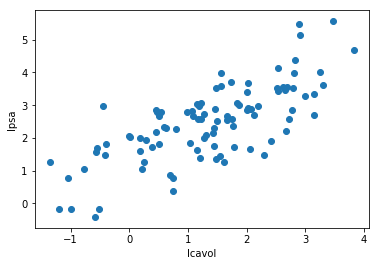

In [21]:
# you can use this cell to visualize here for convenience
scatter(data, 'lcavol')

In [22]:
wanted_features = ['lcavol', 'lweight']
select_features = [column in wanted_features for column in data.columns]
x_train_fs = x_train.loc[:, select_features]
x_train_fs.head()

,lcavol,lweight
1,-0.579818,2.769459
2,-0.994252,3.319626
3,-0.510826,2.691243
4,-1.203973,3.282789
5,0.751416,3.432373


I'm using the shorthand `fs` to indicate this variable is my feature selection data.

Let's see how this randomly chose subset performs

In [23]:
model_fs = linear_model.LinearRegression(normalize=True)
model_fs.fit(x_train_fs, y_train)
train_preds_fs = model_fs.predict(x_train_fs)
metrics.mean_squared_error(y_train, train_preds_fs)

0.5536096363068858

That's a fair but worse than 0.4392 that we achieved with all the features.

But, let's check out the test set performance

In [24]:
x_test_fs = x_test.loc[:, select_features]
test_preds_fs = model_fs.predict(x_test_fs)
metrics.mean_squared_error(y_test, test_preds_fs)

0.4924823476805036

That is indeed lower than our previous test MSE of 0.5212. We have traded off some bias for more variance and improved our performance.

That was just arbitrarily selecting the first two features from the list. I'm sure you can do better!

We haven't had time to cover everything important related to feature selection in this tutorial. For a further reference take a look at the SciKitLearn tutorial on feature selection here http://scikit-learn.org/stable/modules/feature_selection.html.

For example, there are some greedy algorithms for automatic feature selection. If you have the computational resources then I guess you could also try every single combination.

### Ridge Regression

This time we will implement feature selection via ridge regression. To do this we can use the class `sklearn.linear_model.Ridge`. The reference is here at 1.1.2: http://scikit-learn.org/stable/modules/linear_model.html. We will throw all features in, let ridge regression do selection, and see how our own feature sets compare.

Notice we have an additional hyperparameter, $\alpha$. This controls how heavy the penalty is for larger weights. How do we select the best value for this hyperparameter?

#### Cross Validation

To perform hyperparameter tuning we can use a technique called **cross validation**. We take our test set, randomly divide into $k$ training and testing sets. Differnent samples will be randomly placed in each set, each with their own variance. We then average the results over the folds to estimate how well we will do on unseen test data. After splitting the data into $k$ folds (10 is a usual choice for $k$), we will try out different hyperparameter values and select the best one.

![cross_validation](https://www.researchgate.net/profile/Kiret_Dhindsa/publication/323969239/figure/fig10/AS:607404244873216@1521827865007/The-K-fold-cross-validation-scheme-133-Each-of-the-K-partitions-is-used-as-a-test.ppm)

Note that we **do not use the test set to choose hyperparameter values**. This would not give us a fair estimate of how well we do un unseen data. We use the training set to create the 10-folds.

We want to try out different values of $\alpha$, get cross-validated MSE values, and then use those values to choose the best $\alpha$ for our model. 

Much of this process is already wrapped in `sklearn.model_selection.cross_val_score` for us. We just need to define a scoring function which we will do for you here

In [25]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.mean_squared_error(y, preds)

We need to define a reasonable range of values for alpha to search over. We can use `np.linspace` to get a vector of evenly spaced numbers over an interval. Reference here https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html. Let's try $(0, 3)$. We'll also choose the arguments so we get nice clean decimals.

In [26]:
alphas = np.linspace(start=0, stop=0.5, num=11)
alphas

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

Now is your turn. We need to define a variable `mses`, loop over the values of alpha in `alphas`, get the vector of mses for each fold using `cross_val_score`, take the mean, and append each average mse to the list.

Note that the mses returned by `cross_val_score` is a vector, a numpy array, so you will need to call `mean()` on it to get the average MSE for all folds.

In [27]:
"""
Task: Perform 10-fold cross validation on all values of alpha and save the mses.
"""
mses = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, normalize=True)
    mse = model_selection.cross_val_score(ridge, x_train, y_train, cv=10, scoring=scorer)
    mses.append(mse.mean())

In [28]:
assert len(mses) == 11             # must have the same number of scores as we have alpha values
assert isinstance(mses[0], float)  # i.e. not an array, i.e. mean() has been called
print('Success!')

Success!


We will now plot alpha versus MSE and make a choice of our value for $\alpha$.

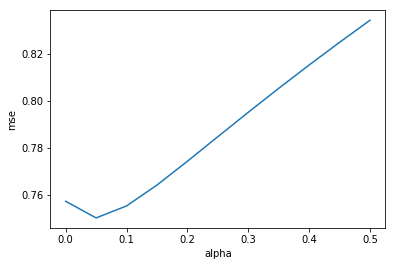

In [29]:
plt.plot(alphas, mses)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [30]:
best_alpha = alphas[np.argmin(mses)]
best_alpha

0.05

That should show you a very clear u-shape and give you an optimal value for $\alpha$.

Now, let's try it out on the full training set and get a final test set MSE.

In [31]:
ridge = linear_model.Ridge(alpha=best_alpha, normalize=True)
ridge.fit(x_train, y_train)
train_preds = ridge.predict(x_train)
test_preds = ridge.predict(x_test)
train_mse = metrics.mean_squared_error(y_train, train_preds)
test_mse = metrics.mean_squared_error(y_test, test_preds)
print('Train MSE: %s' % train_mse)
print('Test MSE: %s' % test_mse)

Train MSE: 0.44360201700630697
Test MSE: 0.4994327373851968


How did it do? Did it beat your feature selection approach?

Let's see what features it selected. We can do this by examining the coefficients.

In [32]:
for i in range(0, len(train.columns) - 1):
    print('Coefficient for %s:%s\t%s' %
          (train.columns[i], 
           '\t' if len(train.columns[i]) < 7 else '',
           ridge.coef_[i]))

Coefficient for lcavol:		0.5150113097084422
Coefficient for lweight:	0.6060729864772452
Coefficient for age:		-0.01600664082233408
Coefficient for lbph:		0.1401782881342947
Coefficient for svi:		0.6956175514337609
Coefficient for lcp:		-0.13942150931487793
Coefficient for gleason:	0.006695464350646462
Coefficient for pgg45:		0.007640029385174187


Something we haven't explored here is whether using ridge regression with a subset of features could improve the result. Try that out for yourself for a final challenge. Can you get your test MSE lower? You can first try by dropping features to which ridge regression has assigned low weights...

In [33]:
"""
Task: See if you can get a lower test MSE with ridge regression and a subset of features
"""

'\nTask: See if you can get a lower test MSE with ridge regression and a subset of features\n'

In [34]:
# step 1: feature selection
wanted_features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 
                   'lcp', 'gleason', 'pgg45']  # CHANGE THIS!!!
select_features = [column in wanted_features for column in data.columns]
x_train_fs = x_train.loc[:, select_features]

In [35]:
# first fit that without ridge regression and check test set MSE
no_rr_model = linear_model.LinearRegression(normalize=True)
no_rr_model.fit(x_train_fs, y_train)
x_test_fs = x_test.loc[:, select_features]
no_rr_test_preds = no_rr_model.predict(x_test_fs)
metrics.mean_squared_error(y_test, no_rr_test_preds)

0.5212740055076001

In [36]:
# now add ridge regression - first find the best alpha
mses = []
alphas = np.linspace(start=0, stop=0.5, num=11)  # YOU CAN ALSO CHANGE THIS!
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, normalize=True)
    mse = model_selection.cross_val_score(ridge, x_train_fs, y_train, cv=10, scoring=scorer)
    mses.append(mse.mean())
best_alpha = alphas[np.argmin(mses)]
print(best_alpha)
print(min(mses))

0.05
0.750144763218588


In [37]:
# now train with ridge regression and evaluate on test set
ridge = linear_model.Ridge(alpha=best_alpha, normalize=True)
ridge.fit(x_train_fs, y_train)
test_preds = ridge.predict(x_test_fs)
metrics.mean_squared_error(y_test, test_preds)

0.4994327373851968